In [1]:
# show all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data preprocessing

In [2]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pip install plotly

In [3]:
df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')

In [4]:
df.shape

(1929, 15)

In [5]:
df.columns
df.head()

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [6]:
df.country.unique()
df.country.nunique()
df.iso_code.unique()
df.iso_code.nunique()
df.date.unique()
df.date.nunique()
df.vaccines.unique()
df.vaccines.nunique()

array(['Algeria', 'Argentina', 'Austria', 'Bahrain', 'Belgium', 'Bermuda',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'England',
       'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Kuwait', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Morocco', 'Myanmar',
       'Netherlands', 'Northern Cyprus', 'Northern Ireland', 'Norway',
       'Oman', 'Panama', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Wales'], dtype=object)

66

array(['DZA', 'ARG', 'AUT', 'BHR', 'BEL', 'BMU', 'BRA', 'BGR', 'CAN',
       'CHL', 'CHN', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'ECU', nan, 'EST',
       'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'HUN', 'ISL', 'IND', 'IDN',
       'IRL', 'IMN', 'ISR', 'ITA', 'KWT', 'LVA', 'LTU', 'LUX', 'MLT',
       'MEX', 'MAR', 'MMR', 'NLD', 'NOR', 'OMN', 'PAN', 'POL', 'PRT',
       'ROU', 'RUS', 'SAU', 'SRB', 'SYC', 'SGP', 'SVK', 'SVN', 'ESP',
       'LKA', 'SWE', 'CHE', 'TUR', 'ARE', 'GBR', 'USA'], dtype=object)

61

array(['2021-01-29', '2021-01-30', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
       '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-31', '2021-02-01', '2020-12-23',
       '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
       '2020-12-28', '2020-12-19', '2020-12-15', '2020-12-16',
       '2020-12-17', '2020-12-18', '2020-12-20', '2020-12-21',
       '2020-12-22', '2020-12-13', '2020-12-14'], dtype=object)

51

array(['Sputnik V', 'Pfizer/BioNTech', 'Pfizer/BioNTech, Sinopharm',
       'Moderna, Pfizer/BioNTech', 'Oxford/AstraZeneca, Sinovac',
       'CNBG, Sinovac', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinovac',
       'Pfizer/BioNTech, Sinopharm, Sputnik V'], dtype=object)

13

In [7]:
# check missing values
df.isnull().sum()

country                                   0
iso_code                                202
date                                      0
total_vaccinations                      635
people_vaccinated                       911
people_fully_vaccinated                1394
daily_vaccinations_raw                  870
daily_vaccinations                       70
total_vaccinations_per_hundred          635
people_vaccinated_per_hundred           911
people_fully_vaccinated_per_hundred    1394
daily_vaccinations_per_million           70
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [8]:
# check the country names of observations with missing iso_code
df[df['iso_code'].isnull()]['country'].unique()

array(['England', 'Northern Cyprus', 'Northern Ireland', 'Scotland',
       'Wales'], dtype=object)

In [9]:
# fill the missing iso_code accordingly
df.loc[df.country == 'Northern Cyprus','iso_code'] = 'NCP'
df['iso_code'].fillna('GBR', inplace=True)

In [10]:
# replace all other missing values with 0
df.fillna(0, inplace=True)

In [52]:
# convert 'date' to datetime variable
df.date = pd.to_datetime(df['date'])
df.date.min()
df.date.max()

Timestamp('2020-12-13 00:00:00')

Timestamp('2021-02-01 00:00:00')

In [12]:
df = df.sort_values('date', ascending=True)
df['date'] = df['date'].dt.strftime('%m-%d-%Y')

### EDA

In [86]:
df_latest = df.groupby('iso_code').last().reset_index()

<Figure size 1800x576 with 0 Axes>

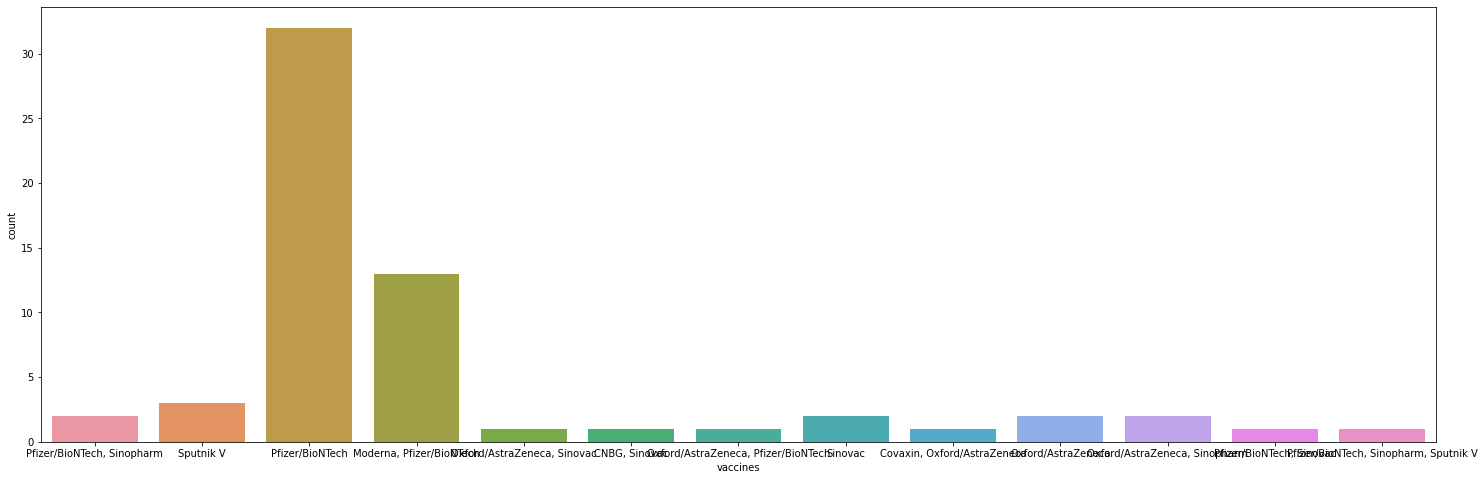

In [87]:
# country counts by different vaccines  
plt.figure(figsize=(25,8))
sns.countplot(x='vaccines', data=df_latest)

In [88]:
# total vaccinations, people vaccinated and ppl vaccinated per hundred by country
d1 = df.groupby('iso_code').total_vaccinations.max().sort_values(ascending=False).to_frame()
d2 = df.groupby('iso_code').people_vaccinated.max().sort_values(ascending=False).to_frame()
d3 = df.groupby('iso_code').people_vaccinated_per_hundred.max().sort_values(ascending=False).to_frame()
d1
d2
d3

,total_vaccinations
iso_code,
USA,32222402.0
CHN,24000000.0
GBR,9790576.0
ISR,4989953.0
IND,3950156.0
...,...
MMR,3800.0
ECU,2982.0
BMU,2932.0


,people_vaccinated
iso_code,
USA,26023153.0
GBR,9296367.0
ARE,3190777.0
ISR,3165415.0
BRA,2107624.0
...,...
LKA,0.0
KWT,0.0
TUR,0.0


,people_vaccinated_per_hundred
iso_code,
GIB,38.25
ISR,36.57
ARE,32.26
GBR,14.36
BHR,10.16
...,...
RUS,0.00
DZA,0.00
ECU,0.00


In [89]:
df_latest = df_latest.merge(d1, left_on='iso_code',right_on='iso_code').merge(d2, left_on='iso_code',right_on='iso_code').merge(d3, left_on='iso_code',right_on='iso_code')

### Latest total vaccinations by each country

In [90]:
fig = px.choropleth(df_latest,                            
                     locations="iso_code",           
                     color="total_vaccinations_y",                 
                     hover_name="country",        
                     projection="natural earth",      
                     color_continuous_scale= 'RdBu',  
                     range_color=[0,5000000])                 
fig.show()          
fig.write_html("example_map.html")         

### Latest people vaccinated by each country

In [93]:
fig = px.choropleth(df_latest,                            
                     locations="iso_code",           
                     color="people_vaccinated_y",                 
                     hover_name="country",        
                     projection="natural earth",      
                     color_continuous_scale= 'RdBu',  
                     range_color=[0,5000000])                 
fig.show()          
fig.write_html("example_map.html")         

### Latest people vaccinated per hundred by each country

In [95]:

fig = px.choropleth(df_latest,                            
                     locations="iso_code",           
                     color="people_vaccinated_per_hundred_y",                 
                     hover_name="country",        
                     projection="natural earth",      
                     color_continuous_scale= 'RdBu',  
                     range_color=[0,5000000])                 
fig.show()          
fig.write_html("example_map.html")         